In [1]:
import scipy.linalg as la
from math_functions.Get_state_index import Get_State_index
from main_grape.Grape import Grape
from main_grape.Evolve import Evolve
%pylab inline
import random as rd
import time
from IPython import display
from qutip import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Defining time scales
total_time = 10.0
steps = 1000

#Defining H0
qubit_state_num = 2

Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)

H0 = Q_z 
       

#Defining Forbidden sates

#states_forbidden_list = [3]

#Defining Concerned states (starting states)
psi0 = [0,1]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1]
states_draw_names = ['0','1']

#Defining U (Target)

U = hadamard_transform(1).full()

#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num)
U0= q_identity

#Defining control Hs
XI = Q_x
ZI = Q_z
Hops = [XI]
ops_max_amp = [4.0]
Hnames =['x']

#Defining convergence parameters
max_iterations = 200
decay = max_iterations/2
convergence = {'rate':0.05, 'update_step':50, 'max_iterations':max_iterations,\
               'conv_target':1e-8,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0.01, 'z':0.01, 'dwdt':0.01,'d2wdt2':0.001*0.0001, 'inter':100}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}

    #Defining initial pulses
u0 = []
u0.append(np.ones(steps))


print U

[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]


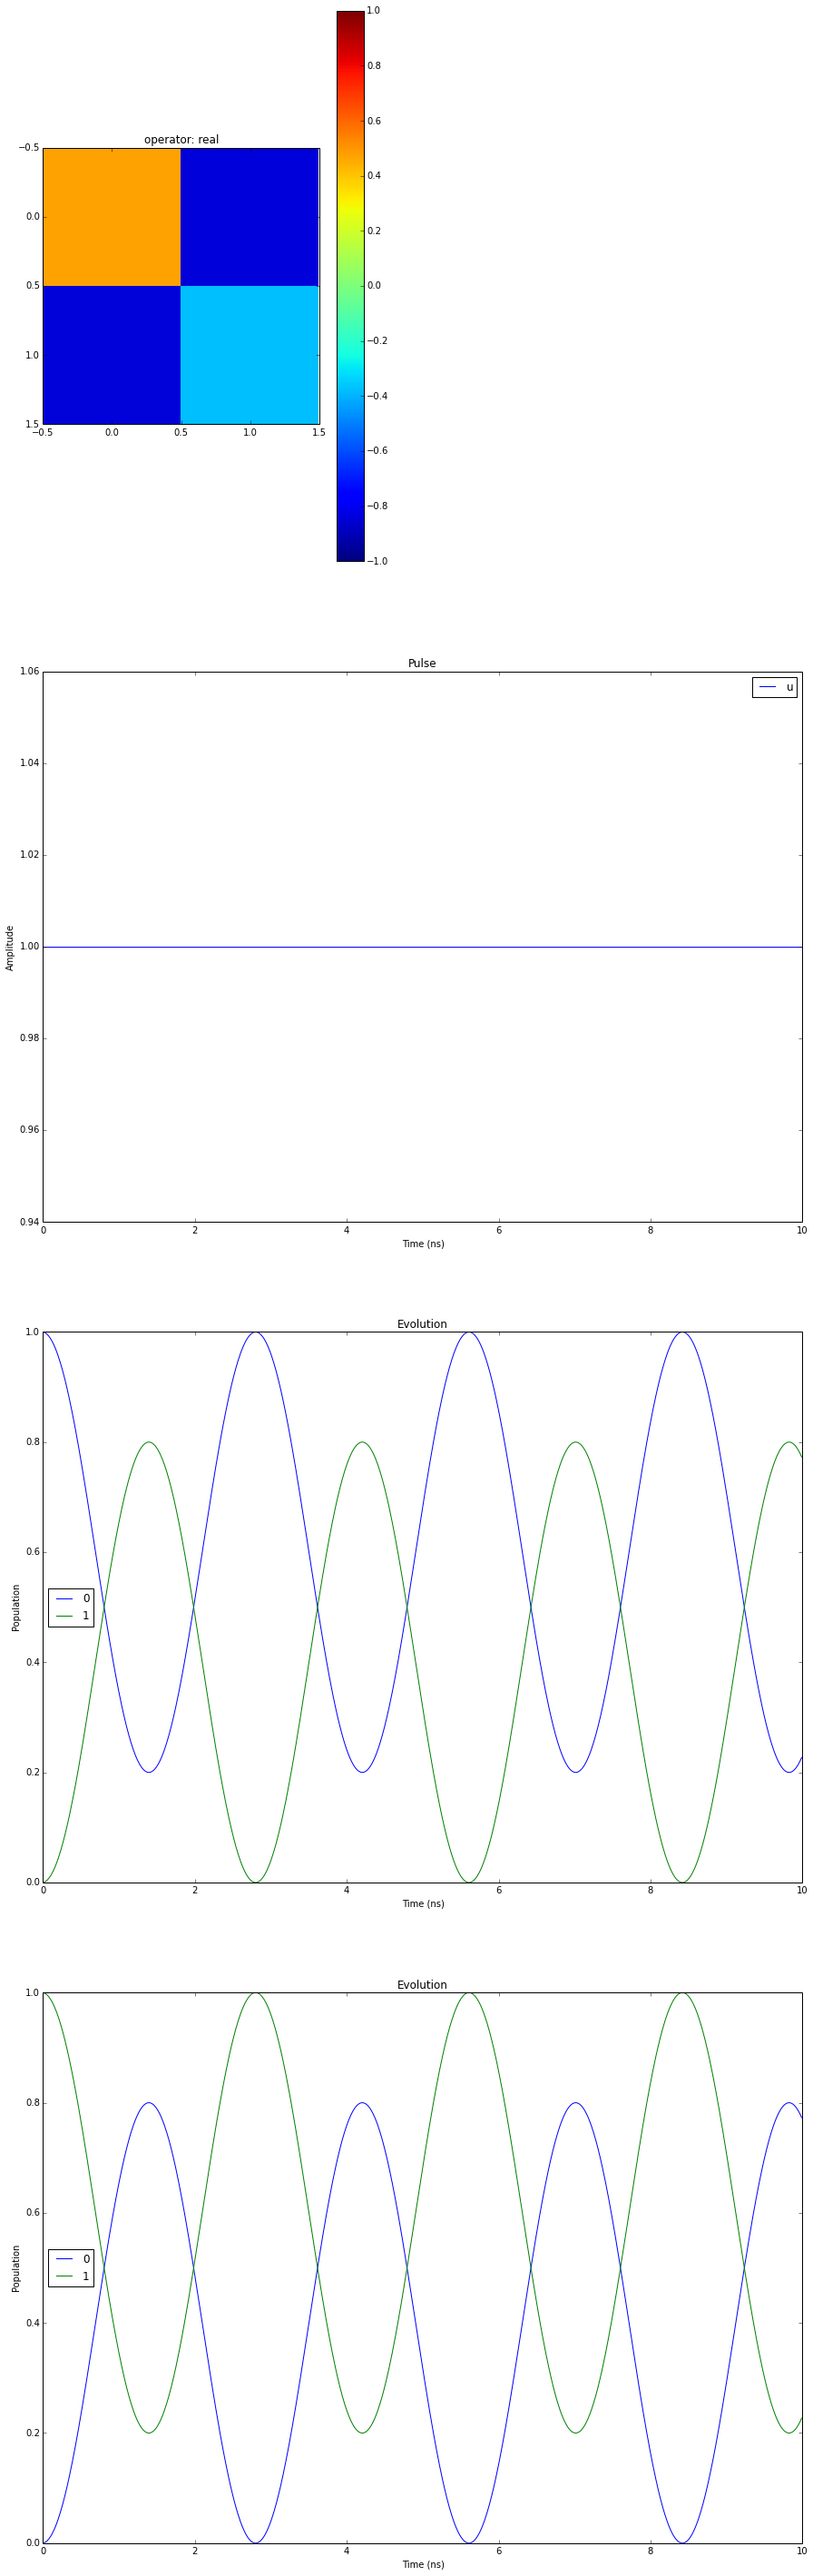

In [3]:
Evolve(H0,Hops,U0,total_time,steps,psi0, u0, draw = [states_draw_list,states_draw_names], U = U)

In [ ]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence, draw = [states_draw_list,states_draw_names],initial_guess = u0)